# CAPSTONE-AI/ML
#### Project Overview
##### Develop a robust and accurate AI/ML model to predict COVID-19 Intensive Care Unit (ICU) admissions, leveraging advanced machine learning techniques, with the aim of assisting healthcare professionals in early identification and proactive management of critical cases, ultimately contributing to improved patient outcomes and resource optimization in healthcare facilities

## Step 1: Import Packages and Data

#### Data Source: 
##### The data source used for this project is COVID-19 - Clinical Data to assess diagnosis. This dataset was downloaded from Kaggle.
##### Brazil recorded first COVID-19 case on February 26 and reached community transmission on March 2

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
covid = pd.read_csv("covid.csv")

In [7]:
covid.head(5)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


## Step 2: Data Cleansing and Wrangling

In [9]:
#Check for Null Values

In [11]:
#Replace Missing Values With the Mean -- Imputation

In [15]:
covid.fillna(covid.mean(numeric_only=True),inplace=True)

In [17]:
covid.head(5)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.786997,-0.715950,-0.817800,-0.719147,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


# EXPLORATORY DATA ANALYSIS

#### Questions to be Answered
##### Check if all patient have 5 ids
##### Looking at Above 65 or below 65 how many of them were admitted to the ICU?

##### Gender Analysis:
##### Display the differences between Males vs Females (Admitted to ICU vs Not Admitted)
##### Display the differences between Males (Over 65) vs Females over 65 (Admitted to the ICU)
##### Immunocomprised Status; how many of them were admitted? How does it vary by age?

##### Patients who were admitted within the different windows (Display any key characterstics found within each time-window)

##### What characterstics do patients who were admitted for more than 12 hours- have?

In [20]:
column_names = covid.columns.tolist()

In [22]:
print(column_names)

['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'ALBUMIN_MEDIAN', 'ALBUMIN_MEAN', 'ALBUMIN_MIN', 'ALBUMIN_MAX', 'ALBUMIN_DIFF', 'BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_MEDIAN', 'BE_VENOUS_MEAN', 'BE_VENOUS_MIN', 'BE_VENOUS_MAX', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_MEDIAN', 'BIC_VENOUS_MEAN', 'BIC_VENOUS_MIN', 'BIC_VENOUS_MAX', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_MEDIAN', 'BILLIRUBIN_MEAN', 'BILLIRUBIN_MIN', 'BILLIRUBIN_MAX', 'BILLIRUBIN_DIFF', 'BLAST_MEDIAN', 'BLAST_MEAN', 'BLAST_MIN', 'BLAST_MAX', 'BLAST_DIFF', 'CALCIUM_MEDIAN', 'CALCIUM_MEAN', 'CALCIUM_MIN', 'CALCIUM_MAX', 'CALCIUM_DIFF', 'CREATININ_MEDIAN', 'CREATININ_MEAN', 'CREATI

In [13]:
#Change columns to numeric data to get correlation matrix

In [26]:
numeric_columns = ['AGE_ABOVE65', 'GENDER','DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED','HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF','WINDOW', 'ICU']

In [28]:
numeric_data = covid[numeric_columns]

In [30]:
correlation_matrix = numeric_data.corr(numeric_only=True)

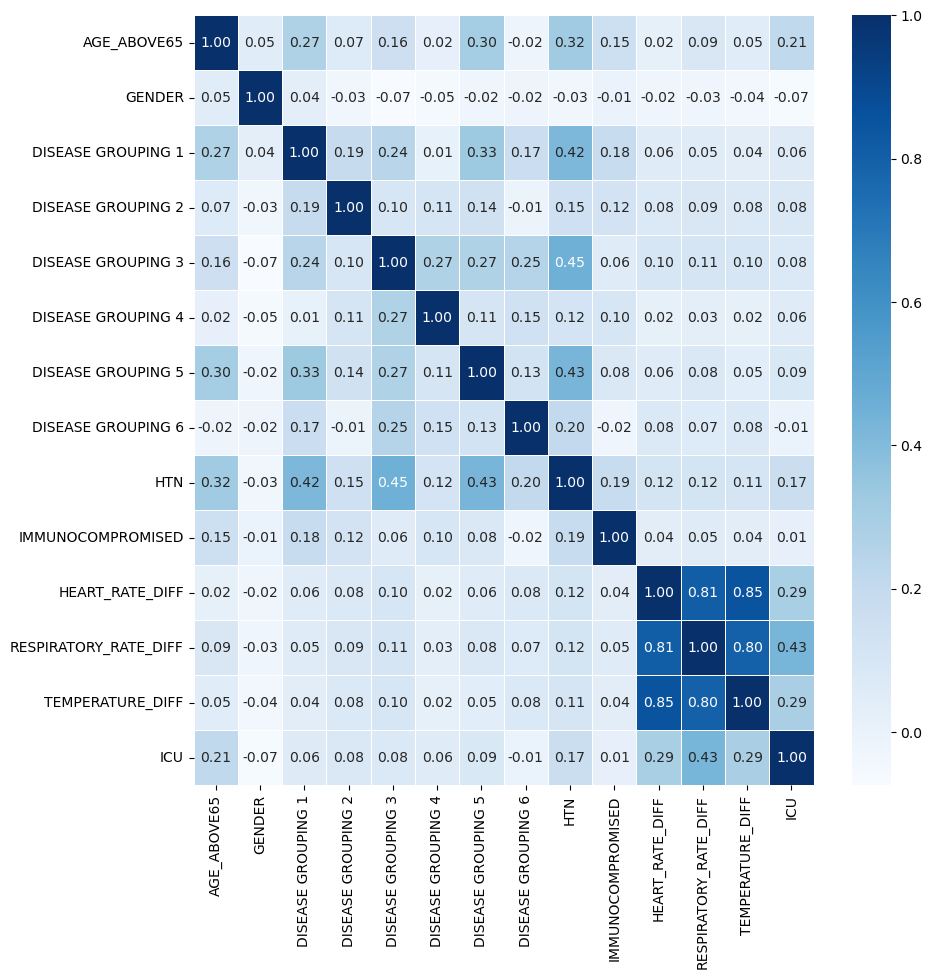

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt='.2f')
plt.show()

In [33]:
#Question 1: Check if all patient have 5 I.D.'s

In [34]:
covid.groupby("PATIENT_VISIT_IDENTIFIER").size().sort_values(ascending=True)

PATIENT_VISIT_IDENTIFIER
0      5
261    5
260    5
259    5
258    5
      ..
123    5
122    5
121    5
191    5
384    5
Length: 385, dtype: int64

In [17]:
#Data Quality: Uniqueness

In [35]:
Unique_Values = covid["PATIENT_VISIT_IDENTIFIER"].nunique()

In [40]:
Unique_Values

385

In [19]:
#Groupby bewteen ICU Patients versus Non-ICU Patients

In [44]:
ICU_Only = covid[covid["ICU"]==1]

In [46]:
Non_ICU = covid[covid["ICU"]==0]

## EXPLORATORY ANALYSIS OF ICU PATIENTS 

In [49]:
ICU_Only.head(3)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
6,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1


In [51]:
#Distribution of Age 

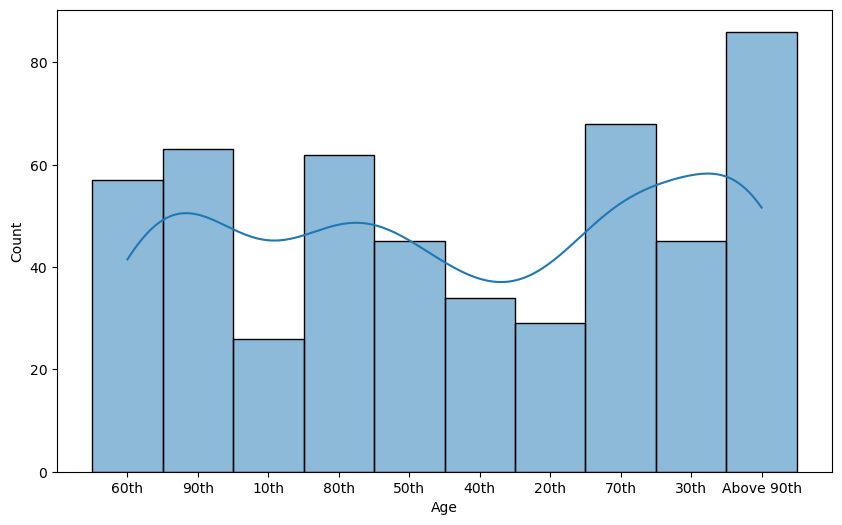

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ICU_Only, x= 'AGE_PERCENTIL', kde=True, bins=20)  
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [55]:
#Question 2: How Many were Above 65 or below 65; How many of them were admitted to the ICU?

In [57]:
Covid_Total_Above65 = covid[covid["AGE_ABOVE65"]==1]

In [59]:
Covid_Total_Above65.count()

PATIENT_VISIT_IDENTIFIER      900
AGE_ABOVE65                   900
AGE_PERCENTIL                 900
GENDER                        900
DISEASE GROUPING 1            900
                             ... 
RESPIRATORY_RATE_DIFF_REL     900
TEMPERATURE_DIFF_REL          900
OXYGEN_SATURATION_DIFF_REL    900
WINDOW                        900
ICU                           900
Length: 231, dtype: int64

In [61]:
Total_Above65 = ICU_Only[ICU_Only["AGE_ABOVE65"]==1]

In [63]:
Total_Above65.count()

PATIENT_VISIT_IDENTIFIER      331
AGE_ABOVE65                   331
AGE_PERCENTIL                 331
GENDER                        331
DISEASE GROUPING 1            331
                             ... 
RESPIRATORY_RATE_DIFF_REL     331
TEMPERATURE_DIFF_REL          331
OXYGEN_SATURATION_DIFF_REL    331
WINDOW                        331
ICU                           331
Length: 231, dtype: int64

In [65]:
#Question: Immunocomprised; how many of them were admitted? How does it vary by age?

In [67]:
ICU_Only["IMMUNOCOMPROMISED"].value_counts()

IMMUNOCOMPROMISED
0.0    429
1.0     86
Name: count, dtype: int64

<Axes: title={'center': 'ICU Patients Immunocomprised Status'}, ylabel='count'>

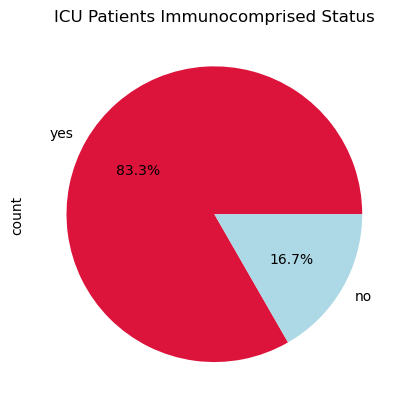

In [69]:
ICU_Only["IMMUNOCOMPROMISED"].value_counts().plot(kind="pie", title = "ICU Patients Immunocomprised Status",autopct='%.1f%%', labels = ['yes','no'],colors=['crimson','lightblue'])

In [71]:
Immuno = Total_Above65[Total_Above65["IMMUNOCOMPROMISED"]==0]

In [73]:
Immuno["PATIENT_VISIT_IDENTIFIER"].count()

262

<Axes: title={'center': 'Top 15 ICU Patient Ages'}, xlabel='Age', ylabel='Frequency'>

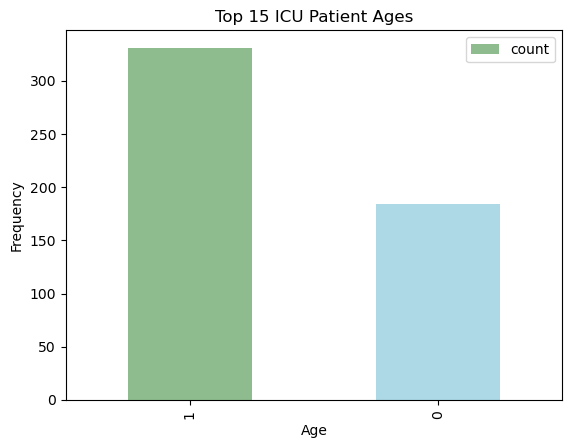

In [75]:
co_2  = ["darkseagreen", "lightblue"]
ICU_Only["AGE_ABOVE65"].astype("int").value_counts().sort_values(ascending =False).head(n=15).plot(kind="bar", title = "Top 15 ICU Patient Ages", xlabel ="Age", ylabel = "Frequency", color = co_2, legend=True)

In [77]:
#Question 3: -- Gender Analysis:
#Males vs Females (Admitted to ICU vs Not Admitted)
#Males (Over 65) vs Females over 65 (Admitted to the ICU)

In [79]:
Total_Male = ICU_Only[ICU_Only["GENDER"]==1]

In [81]:
Total_Above65["GENDER"].count()

331

In [83]:
Total_Female = ICU_Only[ICU_Only["GENDER"]==0]

In [85]:
Total_Female["GENDER"].count()

352

<Axes: title={'center': "Top 15 ICU Patient Gender's"}, xlabel='Age', ylabel='Frequency'>

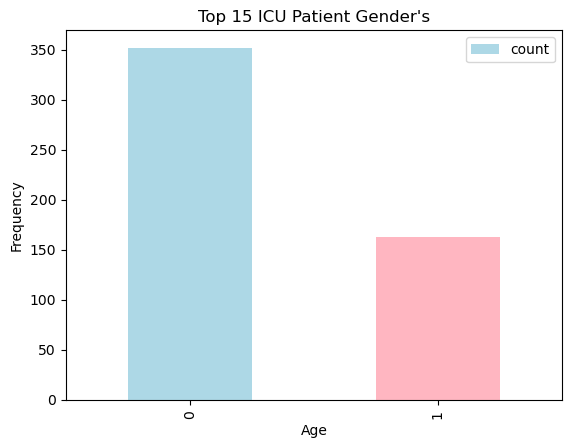

In [87]:
color = ["lightblue", "lightpink"]
ICU_Only["GENDER"].astype("int").value_counts().sort_values(ascending =False).head(n=15).plot(kind="bar", title = "Top 15 ICU Patient Gender's", xlabel ="Age", ylabel = "Frequency", color = color, legend=True)

<Axes: title={'center': 'ICU Patients that were Females: Immunocompromised Spread'}, ylabel='count'>

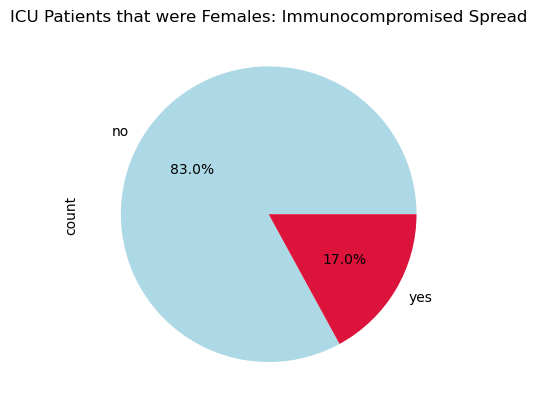

In [89]:
Total_Female["IMMUNOCOMPROMISED"].value_counts().plot(kind='pie', title = "ICU Patients that were Females: Immunocompromised Spread", labels = ['no','yes'],autopct='%.1f%%',colors = ['lightblue','crimson'])

In [91]:
 Total_Male.loc[Total_Male["AGE_ABOVE65"] == 1].count()

PATIENT_VISIT_IDENTIFIER      122
AGE_ABOVE65                   122
AGE_PERCENTIL                 122
GENDER                        122
DISEASE GROUPING 1            122
                             ... 
RESPIRATORY_RATE_DIFF_REL     122
TEMPERATURE_DIFF_REL          122
OXYGEN_SATURATION_DIFF_REL    122
WINDOW                        122
ICU                           122
Length: 231, dtype: int64

<Axes: title={'center': 'ICU Patients that were Males: Immunocompromised Spread'}, ylabel='count'>

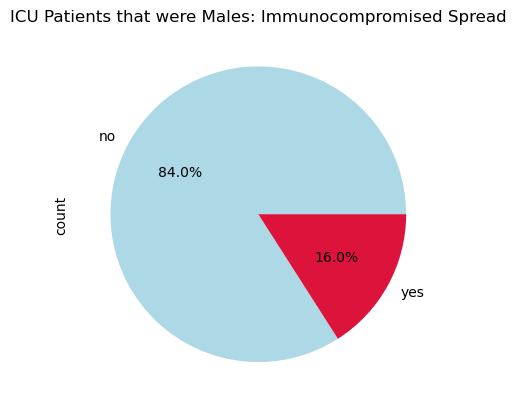

In [93]:
Total_Male["IMMUNOCOMPROMISED"].value_counts().plot(kind='pie', autopct='%.1f%%',title = "ICU Patients that were Males: Immunocompromised Spread", labels = ['no','yes'],colors = ['lightblue','crimson'])

In [95]:
 Total_Female.loc[Total_Female["AGE_ABOVE65"]== 1].count()

PATIENT_VISIT_IDENTIFIER      209
AGE_ABOVE65                   209
AGE_PERCENTIL                 209
GENDER                        209
DISEASE GROUPING 1            209
                             ... 
RESPIRATORY_RATE_DIFF_REL     209
TEMPERATURE_DIFF_REL          209
OXYGEN_SATURATION_DIFF_REL    209
WINDOW                        209
ICU                           209
Length: 231, dtype: int64

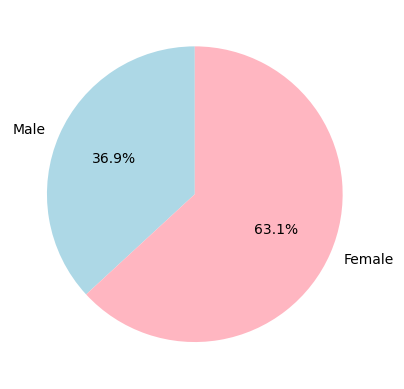

In [97]:
pateint_count = [122,209]
label = ['Male','Female']
colos = ['lightblue','lightpink']
plt.title = "Patient Gender Distribution"
plt.pie(pateint_count,labels= label,colors=colos,startangle=90,autopct='%.1f%%')
plt.show()

# Inferential Statistiscal Analysis

In [101]:
ICU_Only["WINDOW"].describe()

count          515
unique           5
top       ABOVE_12
freq           195
Name: WINDOW, dtype: object

In [21]:
#Top 15 ICU Patients

<Axes: title={'center': 'Top 15 ICU Patients Window'}, xlabel='WINDOW', ylabel='Amount'>

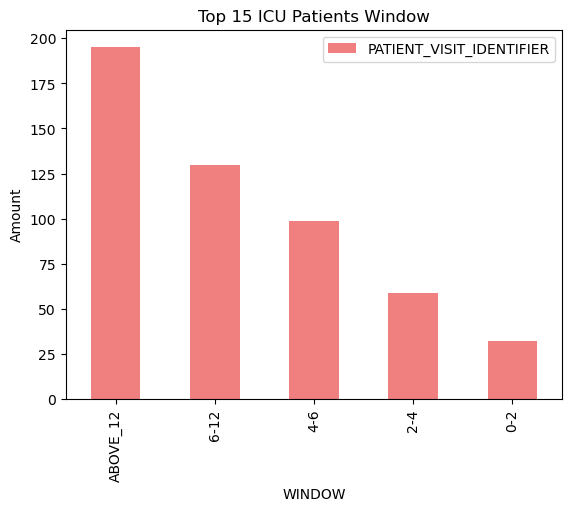

In [103]:
co_1 = ["lightcoral"]
ICU_Only.groupby("WINDOW").agg({"PATIENT_VISIT_IDENTIFIER":"count"}).sort_values(by="WINDOW",ascending=False).head(n=15).plot(kind="bar", title = "Top 15 ICU Patients Window", ylabel="Amount", color=co_1)

In [104]:
Windows = ICU_Only.groupby('WINDOW')

In [107]:
Windows.count()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
WINDOW,,,,,,,,,,,,,,,,,,,,,
0-2,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
2-4,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
4-6,99,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
6-12,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130
ABOVE_12,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195


In [109]:
Male_Window = Total_Male.groupby('WINDOW')

In [111]:
Male_Window.count()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
WINDOW,,,,,,,,,,,,,,,,,,,,,
0-2,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2-4,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
4-6,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
6-12,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
ABOVE_12,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60


<Axes: title={'center': 'Male ICU Patient Above 65 Window Characteristics'}, xlabel=' Window, Age', ylabel='Frequency'>

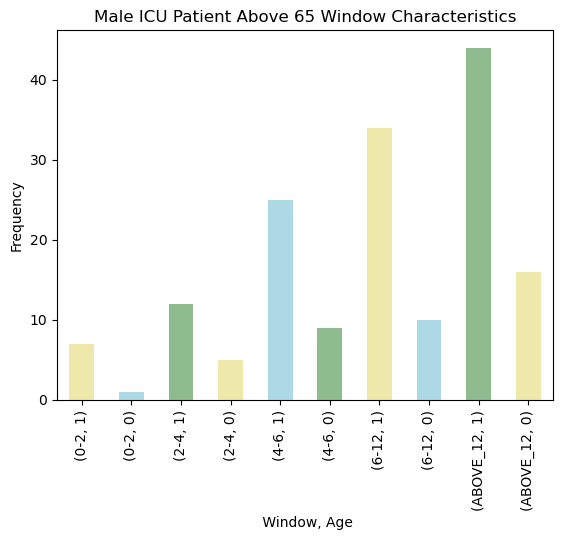

In [117]:
col = ["palegoldenrod", "lightblue", "darkseagreen"]
Male_Window["AGE_ABOVE65"].value_counts().plot(kind="bar", ylabel = "Frequency", xlabel =" Window, Age", color = col, title = "Male ICU Patient Above 65 Window Characteristics")

In [299]:
Female_Window = Total_Female.groupby('WINDOW')

In [301]:
Female_Window.count()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
WINDOW,,,,,,,,,,,,,,,,,,,,,
0-2,24,24,24,24,24,24,24,24,24,24,...,15,18,17,19,19,18,15,18,17,24
2-4,42,42,42,42,42,42,42,42,42,42,...,28,27,27,31,31,28,28,27,27,42
4-6,65,65,65,65,65,65,65,65,65,65,...,47,47,48,48,48,48,47,47,48,65
6-12,86,86,86,86,86,86,86,86,86,86,...,81,82,80,82,82,82,81,82,80,86
ABOVE_12,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135


In [303]:
Female_Window["AGE_ABOVE65"].value_counts()

WINDOW    AGE_ABOVE65
0-2       0              12
          1              12
2-4       1              28
          0              14
4-6       1              41
          0              24
6-12      1              53
          0              33
ABOVE_12  1              75
          0              60
Name: AGE_ABOVE65, dtype: int64

In [305]:
AB12 = ICU_Only[ICU_Only["WINDOW"]=="ABOVE_12"]

In [307]:
AB12["PATIENT_VISIT_IDENTIFIER"].describe()

count    195.000000
mean     187.051282
std      107.930187
min        0.000000
25%       95.000000
50%      183.000000
75%      276.500000
max      382.000000
Name: PATIENT_VISIT_IDENTIFIER, dtype: float64

<Axes: title={'center': 'Above 12 Hour Window: Patient Gender Distribution'}, ylabel='GENDER'>

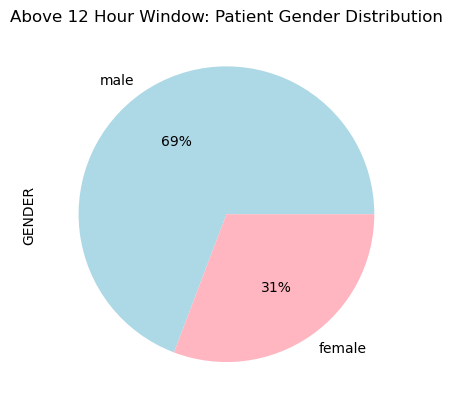

In [309]:
color = ["lightblue", "lightpink"]
AB12["GENDER"].value_counts().plot(kind='pie', autopct='%1.0f%%', labels = ['male','female'], title = "Above 12 Hour Window: Patient Gender Distribution", colors=color)


<Axes: title={'center': 'Above 12 Window: Age Distribution of Patients'}, xlabel='Frequency', ylabel='Age Group'>

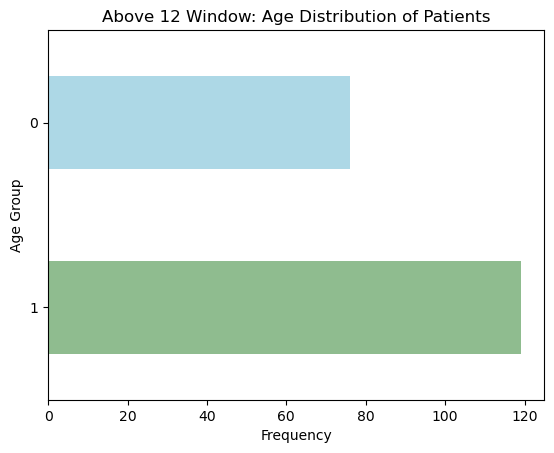

In [311]:
co_2  = ["darkseagreen", "lightblue"]
AB12["AGE_ABOVE65"].value_counts().plot(kind='barh', xlabel = "Frequency", ylabel = "Age Group", title = "Above 12 Window: Age Distribution of Patients", color = co_2)

# Classification Model 

## Step 3: Machine Learning

In [435]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [119]:
#Define variables

In [437]:
X = covid[['ALBUMIN_MEDIAN', 'ALBUMIN_MEAN', 'ALBUMIN_MIN', 'ALBUMIN_MAX', 'ALBUMIN_DIFF', 'BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_MEDIAN', 'BE_VENOUS_MEAN', 'BE_VENOUS_MIN', 'BE_VENOUS_MAX', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_MEDIAN', 'BIC_VENOUS_MEAN', 'BIC_VENOUS_MIN', 'BIC_VENOUS_MAX', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_MEDIAN', 'BILLIRUBIN_MEAN', 'BILLIRUBIN_MIN', 'BILLIRUBIN_MAX', 'BILLIRUBIN_DIFF', 'BLAST_MEDIAN', 'BLAST_MEAN', 'BLAST_MIN', 'BLAST_MAX', 'BLAST_DIFF', 'CALCIUM_MEDIAN', 'CALCIUM_MEAN', 'CALCIUM_MIN', 'CALCIUM_MAX', 'CALCIUM_DIFF', 'CREATININ_MEDIAN', 'CREATININ_MEAN', 'CREATININ_MIN', 'CREATININ_MAX', 'CREATININ_DIFF', 'FFA_MEDIAN', 'FFA_MEAN', 'FFA_MIN', 'FFA_MAX', 'FFA_DIFF', 'GGT_MEDIAN', 'GGT_MEAN', 'GGT_MIN', 'GGT_MAX', 'GGT_DIFF', 'GLUCOSE_MEDIAN', 'GLUCOSE_MEAN', 'GLUCOSE_MIN', 'GLUCOSE_MAX', 'GLUCOSE_DIFF', 'HEMATOCRITE_MEDIAN', 'HEMATOCRITE_MEAN', 'HEMATOCRITE_MIN', 'HEMATOCRITE_MAX', 'HEMATOCRITE_DIFF', 'HEMOGLOBIN_MEDIAN', 'HEMOGLOBIN_MEAN', 'HEMOGLOBIN_MIN', 'HEMOGLOBIN_MAX', 'HEMOGLOBIN_DIFF', 'INR_MEDIAN', 'INR_MEAN', 'INR_MIN', 'INR_MAX', 'INR_DIFF', 'LACTATE_MEDIAN', 'LACTATE_MEAN', 'LACTATE_MIN', 'LACTATE_MAX', 'LACTATE_DIFF', 'LEUKOCYTES_MEDIAN', 'LEUKOCYTES_MEAN', 'LEUKOCYTES_MIN', 'LEUKOCYTES_MAX', 'LEUKOCYTES_DIFF', 'LINFOCITOS_MEDIAN', 'LINFOCITOS_MEAN', 'LINFOCITOS_MIN', 'LINFOCITOS_MAX', 'LINFOCITOS_DIFF', 'NEUTROPHILES_MEDIAN', 'NEUTROPHILES_MEAN', 'NEUTROPHILES_MIN', 'NEUTROPHILES_MAX', 'NEUTROPHILES_DIFF', 'P02_ARTERIAL_MEDIAN', 'P02_ARTERIAL_MEAN', 'P02_ARTERIAL_MIN', 'P02_ARTERIAL_MAX', 'P02_ARTERIAL_DIFF', 'P02_VENOUS_MEDIAN', 'P02_VENOUS_MEAN', 'P02_VENOUS_MIN', 'P02_VENOUS_MAX', 'P02_VENOUS_DIFF', 'PC02_ARTERIAL_MEDIAN', 'PC02_ARTERIAL_MEAN', 'PC02_ARTERIAL_MIN', 'PC02_ARTERIAL_MAX', 'PC02_ARTERIAL_DIFF', 'PC02_VENOUS_MEDIAN', 'PC02_VENOUS_MEAN', 'PC02_VENOUS_MIN', 'PC02_VENOUS_MAX', 'PC02_VENOUS_DIFF', 'PCR_MEDIAN', 'PCR_MEAN', 'PCR_MIN', 'PCR_MAX', 'PCR_DIFF', 'PH_ARTERIAL_MEDIAN', 'PH_ARTERIAL_MEAN', 'PH_ARTERIAL_MIN', 'PH_ARTERIAL_MAX', 'PH_ARTERIAL_DIFF', 'PH_VENOUS_MEDIAN', 'PH_VENOUS_MEAN', 'PH_VENOUS_MIN', 'PH_VENOUS_MAX', 'PH_VENOUS_DIFF', 'PLATELETS_MEDIAN', 'PLATELETS_MEAN', 'PLATELETS_MIN', 'PLATELETS_MAX', 'PLATELETS_DIFF', 'POTASSIUM_MEDIAN', 'POTASSIUM_MEAN', 'POTASSIUM_MIN', 'POTASSIUM_MAX', 'POTASSIUM_DIFF', 'SAT02_ARTERIAL_MEDIAN', 'SAT02_ARTERIAL_MEAN', 'SAT02_ARTERIAL_MIN', 'SAT02_ARTERIAL_MAX', 'SAT02_ARTERIAL_DIFF', 'SAT02_VENOUS_MEDIAN', 'SAT02_VENOUS_MEAN', 'SAT02_VENOUS_MIN', 'SAT02_VENOUS_MAX', 'SAT02_VENOUS_DIFF', 'SODIUM_MEDIAN', 'SODIUM_MEAN', 'SODIUM_MIN', 'SODIUM_MAX', 'SODIUM_DIFF', 'TGO_MEDIAN', 'TGO_MEAN', 'TGO_MIN', 'TGO_MAX', 'TGO_DIFF', 'TGP_MEDIAN', 'TGP_MEAN', 'TGP_MIN', 'TGP_MAX', 'TGP_DIFF', 'TTPA_MEDIAN', 'TTPA_MEAN', 'TTPA_MIN', 'TTPA_MAX', 'TTPA_DIFF', 'UREA_MEDIAN', 'UREA_MEAN', 'UREA_MIN', 'UREA_MAX', 'UREA_DIFF', 'DIMER_MEDIAN', 'DIMER_MEAN', 'DIMER_MIN', 'DIMER_MAX', 'DIMER_DIFF', 'BLOODPRESSURE_DIASTOLIC_MEAN', 'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN', 'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEDIAN', 'BLOODPRESSURE_SISTOLIC_MEDIAN', 'HEART_RATE_MEDIAN', 'RESPIRATORY_RATE_MEDIAN', 'TEMPERATURE_MEDIAN', 'OXYGEN_SATURATION_MEDIAN', 'BLOODPRESSURE_DIASTOLIC_MIN', 'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN', 'TEMPERATURE_MIN', 'OXYGEN_SATURATION_MIN', 'BLOODPRESSURE_DIASTOLIC_MAX', 'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_MAX', 'RESPIRATORY_RATE_MAX', 'TEMPERATURE_MAX', 'OXYGEN_SATURATION_MAX', 'BLOODPRESSURE_DIASTOLIC_DIFF', 'BLOODPRESSURE_SISTOLIC_DIFF', 'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF', 'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL', 'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL', 'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL']]  
y = covid['ICU']

In [ ]:
#Train  Model

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [441]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [445]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)  
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [447]:
y_pred = model.predict(X_test)

In [451]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [470]:
model.score(X_test,y_test)

0.8341968911917098

In [455]:
accuracy

0.8341968911917098

In [121]:
#Confusion Matrix

In [457]:
cm

array([[140,   8],
       [ 24,  21]])

In [465]:
report

'              precision    recall  f1-score   support\n\n           0       0.85      0.95      0.90       148\n           1       0.72      0.47      0.57        45\n\n    accuracy                           0.83       193\n   macro avg       0.79      0.71      0.73       193\nweighted avg       0.82      0.83      0.82       193\n'

## Step 4: Insights & Business Opportunities

##### Business Opportunity 1: Senior Healthcare Management Services:

##### Given the insights that the 90th percentile age group has the highest hospital admission rates, and a significant portion of them are admitted to the ICU, there's an opportunity for a business that specializes in healthcare management services for seniors. This could include personalized healthcare plans, remote monitoring systems, and coordination with healthcare providers to ensure timely and efficient care for this demographic.

##### Business Opportunity 2: Immunocompromised Care Solutions:

##### With 83% of ICU patients having immunocompromised status, there's a potential business opportunity in developing and providing specialized care solutions for immunocompromised individuals. This could involve the creation of immune-boosting products, at-home care services, or technologies that assist in managing the health of this specific patient population.

##### Business Opportunity 3: Senior Emergency Response Systems:

##### Since more males above 65 are admitted to the ICU after 12 hours compared to females, there's an opportunity to create and market emergency response systems tailored to the elderly, with a focus on quicker response times. This could involve the development of wearable devices, mobile applications, or home-based alert systems that can notify emergency services and family members in case of health emergencies for this demographic.

##### Business Opportunity 4: Women's Health and Senior Care Facilities:

##### Considering that more females above 65 are admitted to the ICU, there's a potential business opportunity in establishing specialized healthcare facilities or services that cater to the health needs of elderly women. This could include senior care homes, clinics with women's health specialists, or wellness programs specifically designed for this demographic.

##### Business Opportunity 5: ICU Admission Time Optimization:

##### Given that the top 15 ICU patients were admitted after 12 hours, there's an opportunity to develop and implement solutions that optimize the admission process to the ICU. This could involve the use of technology to streamline emergency admissions, improve communication between healthcare providers, and reduce the time it takes for critical patients to receive intensive care.








### Machine Learning Results 

#### Business Insight:
##### The model achieving a score of 0.8341968911917098 for predicting ICU admittance indicates a reasonably high level of accuracy in its predictions. This could be crucial in the healthcare industry, where timely and accurate predictions of ICU admittance can significantly impact patient outcomes and resource utilization.

#### Business Opportunity:
##### There's a potential business opportunity in developing and offering a predictive analytics platform or software specifically designed for healthcare providers and hospitals. This platform could utilize the trained model to assist medical professionals in identifying patients at a higher risk of ICU admittance. The goal would be to enhance proactive and preventive healthcare measures, allowing for early interventions and better allocation of resources.